# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [407]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [154]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [427]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [208]:
df_train.shape

(15223, 52)

In [428]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [210]:
df_test.shape

(14910, 52)

In [429]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [431]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [432]:
df = df_test.append(df_train).reset_index(drop=True)
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


In [214]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [433]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее специальное', 'Неоконченное высшее', 'Два и более высших образования', 'Ученая степень', 'Высшее', 'Среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Государственная служба', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Банк/Финансы', 'Торговля', 'Управляющая компания', 'Салоны красоты и здоровья', 'Туризм', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Образование', 'Энергетика', 'Информационные технологии', 'Наука', 'Нефтегазовая промышленность', 'Ресторанный бизнес/Общественное питание', 'Логистика', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'Сельское хозяйство', 'Информационные услуги', 'Сборочные производства', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [434]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

В data_frame = 'df_descr' были найдены пропуски в данных. Это можно определить с помощью функции .info.

Отсутствующие данные можно заменить на конкретные числовые значения (например, используя интерполяцию) или удалить.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Значения категориальных признаков определяют факт принадлежности объекта к какой-то категории. 
Примеры таких признаков: пол, страна проживания, номер группы, категория товаров и т.п.
В данном data сете можно просмотреть следующие признаки: MARITAL_STATUS, EDUCATION, REGION_NM и т.д.

Категориальные признаки необходимы для того, чтобы можно было легко провести анализ данных, построив гистрограмму(например)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в столбцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [801]:
# Для удобства тестить данные
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [802]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [803]:
def preproc_data(df_input):
    # Создает копию
    df_output = df_input.copy()
    
    # Удаляет идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Избавляется от проблем с '.' и ',' в столбцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    cols = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in cols:
        df_output[i] = df_output[i].map(lambda x: x.replace(',','.')).astype('float').round().astype('int')
        #df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
        
    # Что-то делает с пропусками    
    #df_output = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    #df_output = df_output[~df_output['AGE'].isnull()]
    df_output = df_output.fillna(0)
    
    cols = ['WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED']
    for i in cols:
        df_output[i] = df_output[i].round().astype('int')
    
    # Кодировала категориальные признаки
    dict_column = {}
    for i in df_output.columns:
        if str(df_output[i].dtype) == 'object':
            set_column = set(df_output[i])
            if (len(set_column) < 100) and (i != 'sample'):
                for j in enumerate(set_column):
                    dict_column[j[1]] = j[0]
            
                df_output[i] = df_output[i].map(dict_column)
            dict_column.clear()
      
                                        
    return df_output

In [804]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [805]:
df_train_preproc

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
14910,0,49,1,0,1,2,1,1,1,10,...,0,1,1,1,6,2,1,1580,1580,0
14911,0,32,1,0,1,3,3,6,1,10,...,0,1,1,1,6,1,1,4020,4020,0
14912,0,52,1,0,1,4,0,0,1,18,...,0,1,2,1,11,0,0,0,0,0
14913,0,39,1,0,1,1,1,5,1,16,...,1,1,1,1,6,3,1,1590,1590,0
14914,0,30,1,0,0,0,0,6,1,2,...,0,1,2,1,16,2,1,1152,2230,0
14915,0,29,1,0,0,0,0,6,3,10,...,0,1,2,1,11,0,0,0,0,0
14916,0,35,1,0,0,1,1,5,4,24,...,0,1,2,2,14,0,0,0,0,0
14917,0,41,1,0,1,0,0,6,1,30,...,1,1,2,1,11,0,0,0,0,0
14918,0,53,1,0,0,2,0,5,1,8,...,0,1,1,1,3,0,0,0,0,0
14919,0,43,1,0,1,0,0,1,1,16,...,0,1,1,1,6,0,0,0,0,0


In [806]:
df_test_preproc

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,0,30,1,0,1,1,1,1,0,16,...,0,1,2,2,8,0,0,0,0,0
1,0,48,0,1,1,0,0,6,1,0,...,0,0,2,1,15,0,0,0,0,0
2,0,35,1,0,0,1,0,6,0,6,...,0,1,1,1,1,0,0,0,0,0
3,0,22,1,0,0,0,0,6,0,24,...,0,1,3,2,9,0,0,0,0,0
4,0,27,1,0,1,2,2,5,1,16,...,0,1,1,1,5,0,0,0,0,0
5,0,44,0,1,0,2,2,1,1,0,...,0,0,1,1,5,0,0,0,0,0
6,0,57,1,0,1,0,0,6,0,29,...,0,1,3,3,14,0,0,0,0,0
7,0,33,1,0,1,2,2,1,4,16,...,0,1,1,1,5,0,0,0,0,0
8,0,53,0,1,1,2,0,1,1,0,...,0,0,1,1,4,0,0,0,0,0
9,1,33,1,0,0,1,0,0,1,10,...,0,1,1,1,6,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [807]:
#функция, которая ищет бинарные столбцы
def BinaryVector(df):
    column_drop = set()
    for i in df.columns:
        if str(df[i].dtype) != 'int64':
            column_drop.add(i)        
    data_describe = df.drop(columns=column_drop, axis=1)
    dict_for_tag = []
    for i in data_describe.columns:
        set_column_tag = set(data_describe[i])
        if len(set_column_tag) != 2:
            dict_for_tag.append(i)     
    data_describe = data_describe.drop(columns=dict_for_tag, axis=1)

    vector = list(data_describe.columns)

    return vector

In [808]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)

df_preproc = df.pipe(BinaryVector)

Column_= df_preproc

X = pd.get_dummies(df_train_preproc, columns=Column_)
X_test = pd.get_dummies(df_test_preproc, columns=Column_)

#print(df_train_preproc)


In [809]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 70 columns):
AGE                           15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null int64
MARITAL_STATUS                15223 non-null int64
GEN_INDUSTRY                  15223 non-null int64
GEN_TITLE                     15223 non-null int64
ORG_TP_STATE                  15223 non-null int64
ORG_TP_FCAPITAL               15223 non-null int64
JOB_DIR                       15223 non-null int64
FAMILY_INCOME                 15223 non-null int64
PERSONAL_INCOME               15223 non-null int32
REG_ADDRESS_PROVINCE          15223 non-null int64
FACT_ADDRESS_PROVINCE         15223 non-null int64
POSTAL_ADDRESS_PROVINCE       15223 non-null int64
TP_PROVINCE                   15223 non-null int64
REGION_NM                     15223 non-null int64
OWN_AUTO            

In [810]:
print(X.shape)
print(y.shape)

(15223, 70)
(15223,)


In [811]:
print(X_test.shape)
print(y_test.shape)

(14910, 70)
(14910,)


In [824]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 21229 to 27435
Data columns (total 70 columns):
AGE                           5024 non-null int64
CHILD_TOTAL                   5024 non-null int64
DEPENDANTS                    5024 non-null int64
EDUCATION                     5024 non-null int64
MARITAL_STATUS                5024 non-null int64
GEN_INDUSTRY                  5024 non-null int64
GEN_TITLE                     5024 non-null int64
ORG_TP_STATE                  5024 non-null int64
ORG_TP_FCAPITAL               5024 non-null int64
JOB_DIR                       5024 non-null int64
FAMILY_INCOME                 5024 non-null int64
PERSONAL_INCOME               5024 non-null int32
REG_ADDRESS_PROVINCE          5024 non-null int64
FACT_ADDRESS_PROVINCE         5024 non-null int64
POSTAL_ADDRESS_PROVINCE       5024 non-null int64
TP_PROVINCE                   5024 non-null int64
REGION_NM                     5024 non-null int64
OWN_AUTO                      5024 non

#### Задание 5. Обучение и оценка качества разных моделей

In [812]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [798]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

In [813]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [815]:
## DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
fit_ = dtc.fit(X_train, y_train)
predict_ = dtc.predict(X_test)
predict_proba_ = dtc.predict_proba(X_test)
print(predict_, '\n')

print('precision', precision_score(y_test, predict_))
print('recall', recall_score(y_test, predict_))
print('accuracy', accuracy_score(y_test, predict_))
print('f1', f1_score(y_test, predict_))

[0 0 0 ... 0 0 1] 

precision 1.0
recall 1.0
accuracy 1.0
f1 1.0


In [816]:
## RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_ = rfc.predict(X_test)
predict_proba_ = rfc.predict_proba(X_test)
print(predict_, '\n')

print('precision', precision_score(y_test, predict_))
print('recall', recall_score(y_test, predict_))
print('accuracy', accuracy_score(y_test, predict_))
print('f1', f1_score(y_test, predict_))

[0 0 0 ... 0 0 1] 

precision 1.0
recall 1.0
accuracy 1.0
f1 1.0


In [817]:
## LogisticRegression

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
predict_ = lg.predict(X_test)
predict_proba_ = lg.predict_proba(X_test)
print(predict_, '\n')

print('precision', precision_score(y_test, predict_))
print('recall', recall_score(y_test, predict_))
print('accuracy', accuracy_score(y_test, predict_))
print('f1', f1_score(y_test, predict_))

[0 0 0 ... 0 0 0] 

precision 0.4
recall 0.006557377049180328
accuracy 0.8781847133757962
f1 0.012903225806451613


In [778]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

# ПОСЧИТАНЫ ВЫШЕ

## Your Code Here

In [818]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает - ТЕПЕРЬ ВСЕ ЯСНО)

## Your Code Here
%matplotlib inline

(-0.01, 1.01)

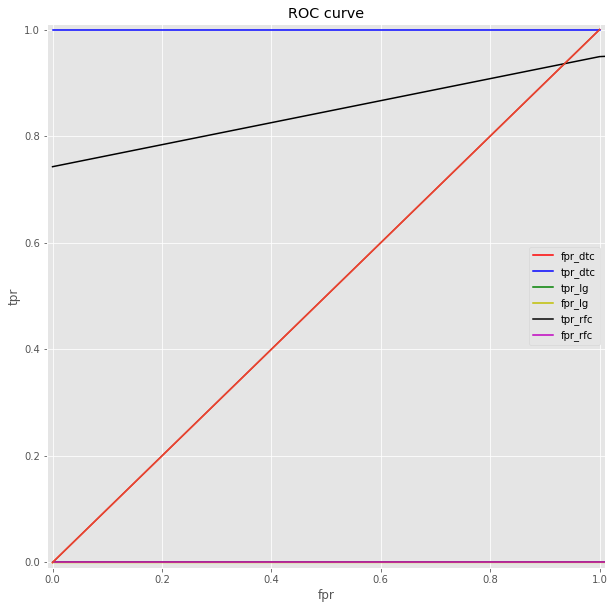

In [819]:
# Потроить roc-кривые всех моделей на одном графике

# Подпишите оси и линии

## Your Code Here

%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 10))

plt.plot(fpr_dtc, label='fpr_dtc', color='r')
plt.plot(tpr_dtc, label='tpr_dtc', color='b')
plt.plot(tpr_lg, label='tpr_lg', color='g')
plt.plot(fpr_lg, label='fpr_lg', color='y')
plt.plot(tpr_rfc, label='tpr_rfc', color='k')
plt.plot(fpr_rfc, label='fpr_rfc', color='m')
plt.legend()
         
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


In [820]:
# Вывести roc_auc каждой модели

print('roc_auc DecisionTreeClassifier: ', roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1]))

print('roc_auc RandomForestClassifier: ', roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

print('roc_auc LogisticRegression: ', roc_auc_score(y_test, lg.predict_proba(X_test)[:,1]))

roc_auc DecisionTreeClassifier:  1.0
roc_auc RandomForestClassifier:  1.0
roc_auc LogisticRegression:  0.6503732535078403


In [821]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
dtc = DecisionTreeClassifier()
roc_auc_dtc = cross_val_score(dtc, X, y, scoring='roc_auc', cv=10)
print(roc_auc_dtc)
print(roc_auc_dtc.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [822]:
rfc = RandomForestClassifier()
roc_auc_rfc = cross_val_score(rfc, X, y, scoring='roc_auc', cv=10)
print(roc_auc_rfc)
print(roc_auc_rfc.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [823]:
lg = LogisticRegression()
roc_auc_lg = cross_val_score(lg, X, y, scoring='roc_auc', cv=10)
print(roc_auc_lg)
print(roc_auc_lg.mean())

[0.87503071 0.97327318 0.81383976 0.88317451 0.9509478  0.81617165
 0.88923909 0.99924605 0.96301103 0.8481796 ]
0.9012113368404806


In [ ]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = 
## Your Code Here

In [830]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc_T = DecisionTreeClassifier()
dtc_T.fit(X_train_T, y_train_T)
predict_T = dtc_T.predict(X_test_T)
predict_proba_T = dtc_T.predict_proba(X_test_T)


print(predict_T, '\n')
print(predict_proba_T, '\n')


[0 0 0 ... 0 1 0] 

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]] 



In [ ]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

1.0


(-0.01, 1.01)

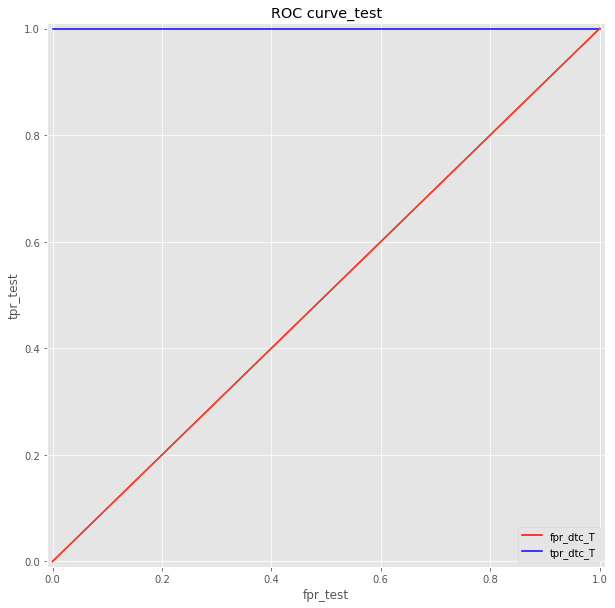

In [835]:
roc_auc_T = roc_auc_score(y_test_T, predict_proba_T[:, 1])
print(roc_auc_T)


%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc_T, tpr_dtc_T, thresholds_dtc_T = roc_curve(y_test_T, dtc_T.predict_proba(X_test_T)[:,1])

                                                  
plt.figure(figsize=(10, 10))

plt.plot(fpr_dtc_T, label='fpr_dtc_T', color='r')
plt.plot(tpr_dtc_T, label='tpr_dtc_T', color='b')

plt.legend()
         
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr_test')
plt.xlabel('fpr_test')
plt.grid(True)
plt.title('ROC curve_test')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)